In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/Prajwal Amin/Desktop/MCA/3RD SEM/FRAUD PROJECT/archive/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
non_fraud = len(df[df.Class == 0])
fraud = len(df[df.Class == 1])
fraud_percent = (fraud / (fraud + non_fraud)) * 100
print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))

Number of Genuine transactions:  284315
Number of Fraud transactions:  492
Percentage of Fraud transactions: 0.1727


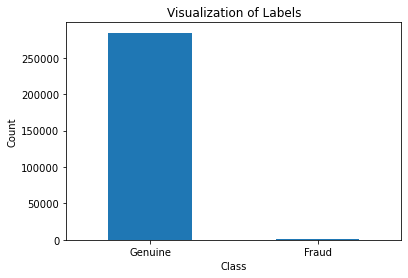

In [4]:
labels = ["Genuine", "Fraud"]
count_classes = df.value_counts(df['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [5]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
df['scaled_amount'] = rs.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rs.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time', 'Amount'], axis=1, inplace=True)
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']
df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(0, 'scaled_time', scaled_time)
df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994983,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994983,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994972,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994972,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994960,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [6]:
x = df.drop(["Class"], axis= 1)
y = df["Class"]
from sklearn.model_selection import train_test_split
(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size= 0.3, random_state= 42)
print("Shape of train_X: ", x_train.shape)
print("Shape of test_X: ", x_test.shape)

Shape of train_X:  (199364, 30)
Shape of test_X:  (85443, 30)


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve, accuracy_score
def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

Before OverSampling, counts of label '1': 356
Before OverSampling, counts of label '0': 199008 

After OverSampling, the shape of train_x: (398016, 30)
After OverSampling, the shape of train_y: (398016,) 

After OverSampling, counts of label '1', %: 50.0
After OverSampling, counts of label '0', %: 50.0


<AxesSubplot:xlabel='Class', ylabel='count'>

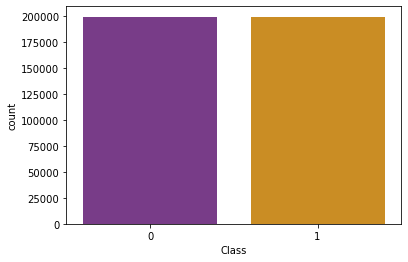

In [9]:
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
x_train_s, y_train_s = sm.fit_resample(x_train, y_train)

print('After OverSampling, the shape of train_x: {}'.format(x_train_s.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_s.shape))

print("After OverSampling, counts of label '1', %: {}".format(sum(y_train_s==1)/len(y_train_s)*100.0,2))
print("After OverSampling, counts of label '0', %: {}".format(sum(y_train_s==0)/len(y_train_s)*100.0,2))

sns.countplot(x=y_train_s, data=df, palette='CMRmap')

Evaluation of Decision Tree Model After SMOT

Accuracy: 0.99747
Precision: 0.36014
Recall: 0.75735
F1-score: 0.48815


Text(0.5, 15.0, 'Predicted Label')

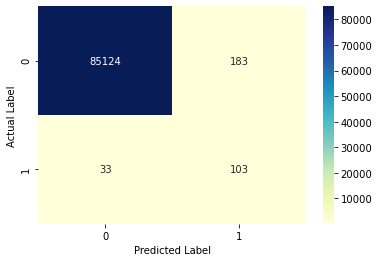

In [22]:
dt = DecisionTreeClassifier()
dt.fit(x_train_s, y_train_s)
y_pred = dt.predict(x_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Evaluation of Decision Tree Model After SMOT')
print()
metrics(y_test, y_pred.round())
dt_f1_score = f1_score(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

Text(0.5, 1.0, 'Precision Recall Curve')

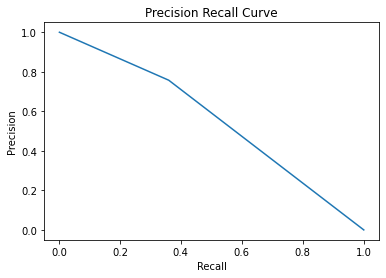

In [23]:
y_pred_prob = dt.predict_proba(x_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

Evaluation of Logistic Regression Model After SMOT

Accuracy: 0.97349
Precision: 0.05329
Recall: 0.93382
F1-score: 0.10083


Text(0.5, 15.0, 'Predicted Label')

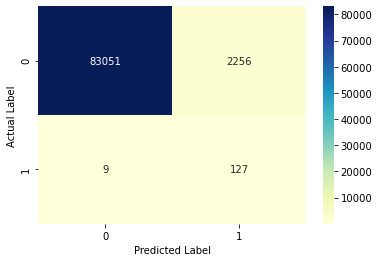

In [24]:
# Logistic Regression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(x_train_s, y_train_s)
y_pred = logreg.predict(x_test)
logreg_cnf_matrix = confusion_matrix(y_test, y_pred)
print('Evaluation of Logistic Regression Model After SMOT')
print()
metrics(y_test, y_pred.round())
logreg_f1_score = f1_score(y_test, y_pred)
sns.heatmap(pd.DataFrame(logreg_cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

Text(0.5, 1.0, 'Precision Recall Curve')

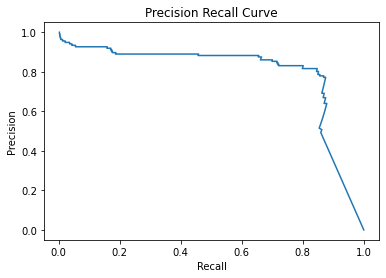

In [25]:
y_pred_prob = logreg.predict_proba(x_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

In [26]:
# Neural Network
n_inputs = x_train_s.shape[1]

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')])
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_s, y_train_s, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
1062/1062 - 3s - loss: 0.0764 - accuracy: 0.9708 - val_loss: 0.0246 - val_accuracy: 0.9956
Epoch 2/20
1062/1062 - 4s - loss: 0.0157 - accuracy: 0.9966 - val_loss: 0.0112 - val_accuracy: 0.9998
Epoch 3/20
1062/1062 - 3s - loss: 0.0087 - accuracy: 0.9983 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 4/20
1062/1062 - 3s - loss: 0.0063 - accuracy: 0.9987 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 5/20
1062/1062 - 3s - loss: 0.0050 - accuracy: 0.9990 - val_loss: 0.0054 - val_accuracy: 0.9996
Epoch 6/20
1062/1062 - 4s - loss: 0.0041 - accuracy: 0.9992 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 7/20
1062/1062 - 3s - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.0034 - val_accuracy: 0.9999
Epoch 8/20
1062/1062 - 4s - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 9/20
1062/1062 - 3s - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 10/20
1062/1062 - 4s - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0018 - 

<AxesSubplot:>

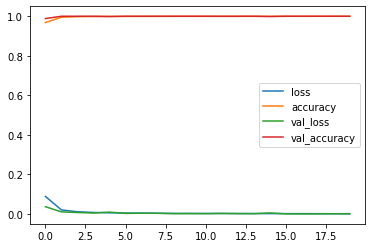

In [17]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [18]:
score = model.evaluate(x_test, y_test)
print(score)

2671/2671 [==============================] - 9s 3ms/step - loss: 0.0108 - accuracy: 0.9990: 0s - loss:
[0.01081957295536995, 0.998993456363678]


Evaluation of Neural Network Model After SMOT

Accuracy: 0.99899
Precision: 0.63736
Recall: 0.85294
F1-score: 0.72956


Text(0.5, 15.0, 'Predicted Label')

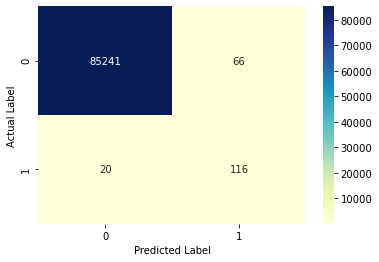

In [19]:
y_pred= np.argmax(model.predict(x_test), axis=-1) 
print('Evaluation of Neural Network Model After SMOT')
print()
metrics(y_test, y_pred.round())
nn_f1_score = f1_score(y_test, y_pred)
nn_cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(nn_cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [28]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 
               'Neural Network'],
    'Score': [ logreg_f1_score,dt_f1_score,
               nn_f1_score]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(5)

,Model
Score,
0.729560,Neural Network
0.488152,Decision Tree
0.100834,Logistic Regression


In [ ]:
names = ['Decision Tree',  'Loistic Regression', 'Neural Network', ]
results = [dt_f1_score, logreg_f1_score, nn_f1_score, ]
plt.figure(figsize=(10,6))
plt.bar(names,results)
plt.xlabel("Models", fontsize=16) #seting the xtitle and size
plt.ylabel("Scores", fontsize=16) # Seting the ytitle and size
plt.title("Comparison Between Models", fontsize=20)
plt.legend()
plt.show()

No handles with labels found to put in legend.
